In [1]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [2]:
X=np.load("X.npy")
Y=np.load("Y.npy")

In [3]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

In [11]:
input_size = 100
hidden_size = 200
num_classes = 500
num_epochs = 5
batch_size = 100
learning_rate = 0.0001

In [12]:
class Net(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        return out

In [13]:
model = Net(input_size,hidden_size,num_classes)
model.cuda()
criterion = nn.CrossEntropyLoss()  
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [14]:
epochs = 100

In [ ]:
# test
losses=[]
for epoch in range(epochs):
    
    epoch +=1
    
    for x,y in zip(X_train,Y_train):
        y=np.array([y])
        x=torch.from_numpy(np.expand_dims(x, axis=0))
        y=torch.from_numpy(y)
        
        inputs = Variable(x.type(torch.cuda.FloatTensor))
        labels = Variable(y.type(torch.cuda.LongTensor))
        
        #clear grads
        optimizer.zero_grad()
        #forward to get predicted values
        outputs = model.forward(inputs)
        
            
        loss = criterion(outputs, labels)
        

        losses.append(float(loss))
        loss.backward()# back props
        optimizer.step()# update the parameters
    print('epoch {}, loss {}'.format(epoch,loss.data[0]))

## Evaluate the performance on the training data

In [16]:
# X_train and Y_train
model_pred=model(Variable(torch.from_numpy(X_train).type(torch.cuda.FloatTensor)))

train_correct=0
Y_train_pred=[]
total_train_compounds=len(Y_train)
for i,train_compound in enumerate(model_pred):
    
    
    max_,max_index=torch.max(train_compound,0)
    Y_train_pred.append(int(max_index))
    if (int(max_index)==Y_train[i]):
        train_correct+=1

print("The train accuracy is {}".format((train_correct/total_train_compounds)*100))

The train accuracy is 82.9700272479564


## Evaluate the model on the testing data

In [17]:
# X_test and Y_test
model_pred_test=model(Variable(torch.from_numpy(X_test).type(torch.cuda.FloatTensor)))

# The test accuracy
test_correct=0
Y_test_pred=[]
total_test_compounds=len(Y_test)
for i,test_compound in enumerate(model_pred_test):
    
    
    max_,max_index=torch.max(test_compound,0)
    Y_test_pred.append(int(max_index))
    if (int(max_index)==Y_test[i]):
        test_correct+=1

print("The test accuracy is {}".format((test_correct/total_test_compounds)*100))

The test accuracy is 70.03058103975535


In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
## Saved , uncomment the below line if you want to save it
# np.save("Y_test",Y_test)
# np.save("Y_test_pred.npy",np.array(Y_test_pred))

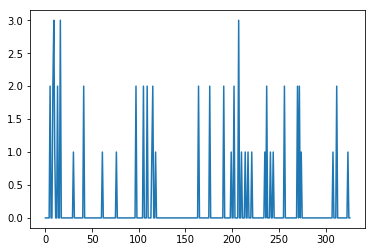

In [19]:
plt.plot(Y_test_pred)

In [20]:
## For the entire dataset

In [21]:
#X and Y
model_pred=model(Variable(torch.from_numpy(X).type(torch.cuda.FloatTensor)))
correct=0
Y_pred=[]
total_compounds=len(Y)
for i,compound in enumerate(model_pred):
    
    
    max_,max_index=torch.max(compound,0)
    Y_pred.append(int(max_index))
    if (int(max_index)==Y[i]):
        correct+=1

print("The total accuracy is {}".format((correct/total_compounds)*100))

The total accuracy is 81.67330677290838


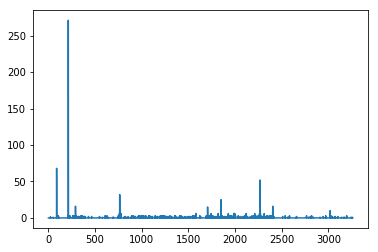

In [22]:
plt.plot(Y_pred)